# ANOVA
### Analysis of variance (ANOVA)  

A test for differeces between groups

In [15]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

In [16]:
alpha = 0.2
stack_overflow = pd.read_feather('datasets/stack_overflow.feather')

In [17]:
stack_overflow['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

c:\Users\codlw\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


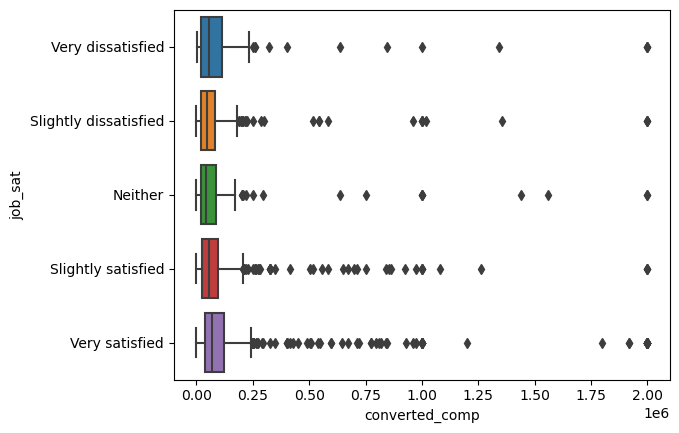

In [18]:
sns.boxplot(data = stack_overflow,
            x = 'converted_comp',
            y = 'job_sat')
plt.show()

In [19]:
pingouin.anova(data = stack_overflow, 
                dv = 'converted_comp',
                between = 'job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


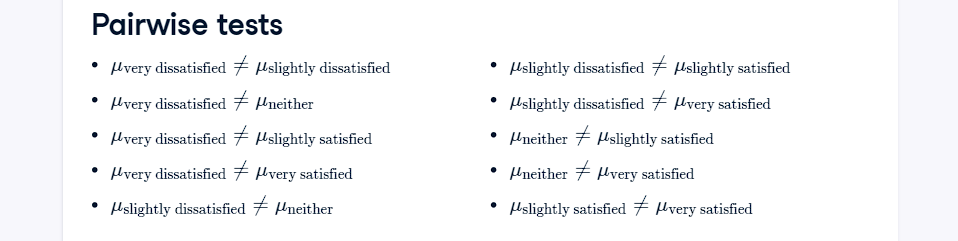

#### Pairwise test()

In [20]:
pingouin.pairwise_tests(data = stack_overflow, 
                        dv = 'converted_comp',
                        between = 'job_sat',
                        padjust = 'none'
                        )

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


As the number of groups increases, the number of comparisons increases

In [21]:
# BONFERRONI CORRECTION
pingouin.pairwise_tests(data = stack_overflow, 
                        dv = 'converted_comp',
                        between = 'job_sat',
                        padjust = 'bonf'
                        )

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


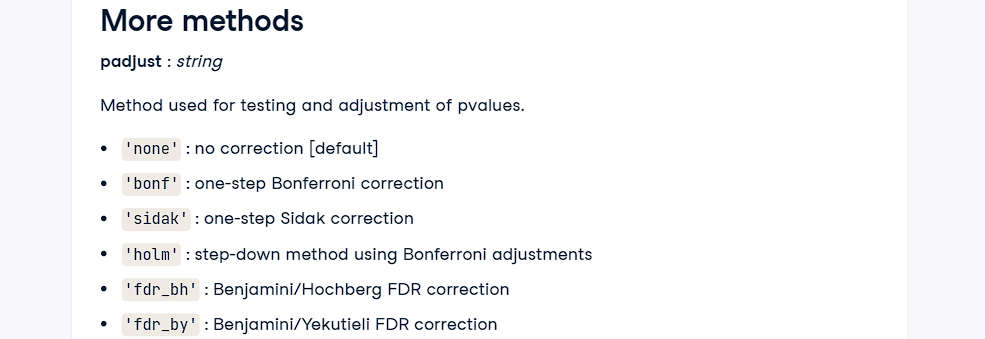

----------------------------------------------------------------------------------------------------------------------------------------
### Late shipments

In [23]:
late_shipments = pd.read_feather('datasets/late_shipments.feather')

In [29]:
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()
xbar_pack_by_mode

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64

In [30]:
s_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].std()
s_pack_by_mode

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64

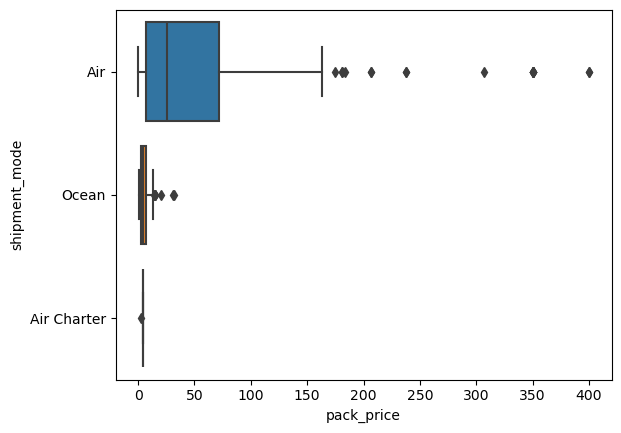

In [32]:
sns.boxplot(data = late_shipments,
            x = 'pack_price',
            y = 'shipment_mode'
            )
plt.show()

In [34]:
pingouin.anova(data = late_shipments,
                dv = 'pack_price',
                between = 'shipment_mode'
                )

,Source,ddof1,ddof2,F,p-unc,np2
0,shipment_mode,2,997,21.8646,5.089479e-10,0.042018


In [37]:
# Pairwise tests
pingouin.pairwise_tests(data = late_shipments,
                        dv = 'pack_price',
                        between = 'shipment_mode',
                        padjust = 'none'
                        )

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


In [40]:
# Bonferroni Correction
pingouin.pairwise_tests(data = late_shipments,
                        dv = 'pack_price',
                        between = 'shipment_mode',
                        padjust = 'bonf'
                        )

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775
